In [1]:
import pandas as pd 

df = pd.read_csv('naver_news_민식이법_1.csv')

In [2]:
df.head()

,Title,content,Date,Source,Link,tokens
0,"이한기전북도의원""민식이법선제적대응방안마련해야""",0,뉴스1,https://www.news1.kr/articles/?3997543,0.0,"이한기,전북,의원,선제,응방,마련,해야"
1,부산첫민식이법적용운전자에벌금500만원집행유예,0,연합뉴스,http://yna.kr/AKR20200715060400051?did=1195m,0.0,"벌금,500,집행유예"
2,부산첫민식이법적용운전자에벌금형집행유예,0,KBS,http://news.kbs.co.kr/news/view.do?ncd=4495352...,0.0,"벌금형,집행유예"
3,해운대스쿨존12차사고운전자모두민식이법적용,2일 전 네이버뉴,SBS,https://news.sbs.co.kr/news/endPage.do?news_id...,0.0,"12,사고,모두"
4,"해운대6세사망,불법좌회전돌진둘다민식이법적용",0,중앙일보,https://news.joins.com/article/olink/23417721,0.0,"불법,좌회전,돌진,다민"


In [3]:
import re

def pre_process(text):
    # 특수 기호 삭제
    text = re.sub('[^a-zA-z0-9가-힣ㄱ-ㅎㅏ-ㅣ.,"""%@]', '',text).strip()
    # 이메일 등장하면, 그 뒷문장 모두 삭제
    text = re.sub('[a-zA-Z0-9] + \@[a-zA-Z0-9]+\.[a-z]{1,3}.[a-z]{1,3}.+', '',text).strip()
    text = text.replace('\d+', '')
    
    return text

In [4]:
df['Title'] = df['Title'].map(lambda x : pre_process(x))
df.head()

,Title,content,Date,Source,Link,tokens
0,"이한기전북도의원""민식이법선제적대응방안마련해야""",0,뉴스1,https://www.news1.kr/articles/?3997543,0.0,"이한기,전북,의원,선제,응방,마련,해야"
1,부산첫민식이법적용운전자에벌금500만원집행유예,0,연합뉴스,http://yna.kr/AKR20200715060400051?did=1195m,0.0,"벌금,500,집행유예"
2,부산첫민식이법적용운전자에벌금형집행유예,0,KBS,http://news.kbs.co.kr/news/view.do?ncd=4495352...,0.0,"벌금형,집행유예"
3,해운대스쿨존12차사고운전자모두민식이법적용,2일 전 네이버뉴,SBS,https://news.sbs.co.kr/news/endPage.do?news_id...,0.0,"12,사고,모두"
4,"해운대6세사망,불법좌회전돌진둘다민식이법적용",0,중앙일보,https://news.joins.com/article/olink/23417721,0.0,"불법,좌회전,돌진,다민"


In [5]:
df = df.fillna(value = 0)
df

,Title,content,Date,Source,Link,tokens
0,"이한기전북도의원""민식이법선제적대응방안마련해야""",0,뉴스1,https://www.news1.kr/articles/?3997543,0.0,"이한기,전북,의원,선제,응방,마련,해야"
1,부산첫민식이법적용운전자에벌금500만원집행유예,0,연합뉴스,http://yna.kr/AKR20200715060400051?did=1195m,0.0,"벌금,500,집행유예"
2,부산첫민식이법적용운전자에벌금형집행유예,0,KBS,http://news.kbs.co.kr/news/view.do?ncd=4495352...,0.0,"벌금형,집행유예"
3,해운대스쿨존12차사고운전자모두민식이법적용,2일 전 네이버뉴,SBS,https://news.sbs.co.kr/news/endPage.do?news_id...,0.0,"12,사고,모두"
4,"해운대6세사망,불법좌회전돌진둘다민식이법적용",0,중앙일보,https://news.joins.com/article/olink/23417721,0.0,"불법,좌회전,돌진,다민"
...,...,...,...,...,...,...
495,6세숨졌는데기억안난다는운전자민식이법적용되나,2020.06.16,국민일보,http://news.kmib.co.kr/article/view.asp?arcid=...,0.0,"숨졌,는데,기억,난다는,운전,자민"
496,"민식이아빠""7억원요구불륜설모두거짓""유튜버고소",2020.05.15,매일신문,https://news.imaeil.com/Society/20200515111959...,0.0,"아빠,요구불,모두,거짓,튜버,고소"
497,민식이법우려에경찰청행정역량집중,2020.04.05,서울경제,https://www.sedaily.com/NewsView/1Z1CUW4I7Y,0.0,"우려,경찰청,행정,역량,집중"
498,",민식이법개정청원관련""입법취지이해해달라""",2020.05.20,MBC,https://imnews.imbc.com/news/2020/politics/art...,0.0,"개정,청원,관련,입법,취지,이해"


In [7]:
stop_word = ['에서', '습니다', '민식이법', '김민식', '으로', '에게', '부터', '입니다', '는데요', '당시', '다고', '합니다', '따라',
             '식이', '스쿨', '운전자', '이법', '존서', '고운', '존사', '100', '까지', '전자', '..', '법위', '전주', '부산', 
             '고운', '경주', '망사', '적용', '보험', '해운대', '시행', '가입', '어린이', '아이', '제주', '사망', '노선',
             '고민식', '버스', '변경']
from konlpy.tag import Mecab
def postagging_mecab(text):
    mecab = Mecab()
    text = mecab.morphs(text)
    text = [i for i in text if len(i)>1]
    text = [i for i in text if i not in stop_word]
    return text

ModuleNotFoundError: No module named 'konlpy'

In [29]:
def make_tokens(df, filename):
    df['tokens'] = ''
    tokens_list = []
    for i, row in df.iterrows():
        if i % 100 == 0 :
            print(i, '/', len(df))
        token = postagging_mecab(df['Title'][i])
        df['tokens'][i] = ','.join(token)
    df.to_csv(filename, index = False)
    return df

In [30]:
df = make_tokens(df, 'news_data.csv')

0 / 500


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


100 / 500
200 / 500
300 / 500
400 / 500


In [31]:
df.head()

,Title,content,Date,Source,Link,tokens
0,"이한기전북도의원""민식이법선제적대응방안마련해야""",0,뉴스1,https://www.news1.kr/articles/?3997543,0.0,"이한기,전북,의원,선제,응방,마련,해야"
1,부산첫민식이법적용운전자에벌금500만원집행유예,0,연합뉴스,http://yna.kr/AKR20200715060400051?did=1195m,0.0,"벌금,500,집행유예"
2,부산첫민식이법적용운전자에벌금형집행유예,0,KBS,http://news.kbs.co.kr/news/view.do?ncd=4495352...,0.0,"벌금형,집행유예"
3,해운대스쿨존12차사고운전자모두민식이법적용,2일 전 네이버뉴,SBS,https://news.sbs.co.kr/news/endPage.do?news_id...,0.0,"12,사고,모두"
4,"해운대6세사망,불법좌회전돌진둘다민식이법적용",0,중앙일보,https://news.joins.com/article/olink/23417721,0.0,"불법,좌회전,돌진,다민"


In [32]:
tokens = []
for i in range(len(df)):
    tokens += df['tokens'][i].split(',')
    
total = pd.DataFrame(tokens)
total = pd.DataFrame(total[0].value_counts('')).rename(columns={0:'total'})
total = total.reset_index()
total

,index,total
0,사고,70
1,구속,56
2,놀이,44
3,사례,30
4,면허,25
...,...,...
744,가민,1
745,정답,1
746,광주,1
747,경중,1


In [33]:
index = []
word = []
for i in range(len(df)):
    if total['total'][i] >= 15:
        index.append(total['index'][i])
        word.append(total['total'][i])
B = dict(zip(index, word))
B    

{'사고': 70,
 '구속': 56,
 '놀이': 44,
 '사례': 30,
 '면허': 25,
 '우려': 24,
 '처벌': 21,
 '차량': 20,
 '30': 20,
 '논란': 19,
 '과속': 18,
 '초등': 17,
 '운전': 16,
 '경찰': 16,
 '벌금형': 15,
 '급증': 15,
 '촉발': 15}

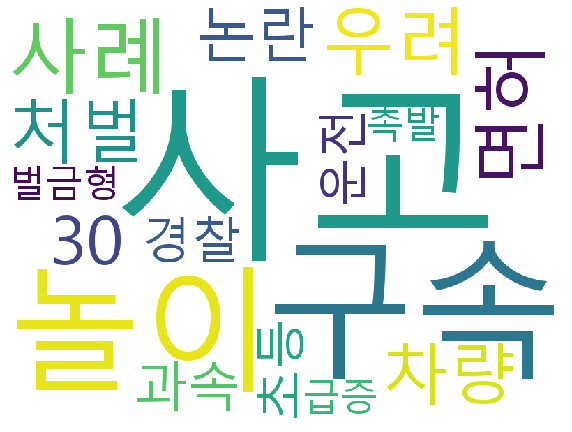

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
font_path = './font_name/malgun.ttf'
wc = WordCloud(font_path = font_path, background_color = 'white', width = 800, height = 600)
cloud = wc.generate_from_frequencies(B)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)

In [17]:
from PIL import Image
import numpy as np

car_mask = np.array(Image.open("car_acc.png"))

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color = "white",
    mask = car_mask
)

wordcloud = wordcloud.generate_from_frequencies(A)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'car_acc.png'

In [19]:
import numpy as np
import PIL.Image as pilimg
im = pilimg.open('carc.png')
pix = np.array(im)
from wordcloud import ImageColorGenerator

FileNotFoundError: [Errno 2] No such file or directory: 'carc.png'

In [18]:
font_path = './font_name/malgun.ttf'
wc = WordCloud(font_path = font_path, relative_scaling = 0.2, mask = pix, background_color = 'white', width = 800, height = 600)
cloud = wc.generate_from_frequencies(B)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud, interpolation = 'bilinear')

NameError: name 'pix' is not defined